<a href="https://colab.research.google.com/github/aapetukhov/data_science_final_project/blob/main/data_science_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Финальный проект по анализу данных

Перед вами мой проект по анализу данных с сайта подержанных автомобилей auto.ru. Проект разбит на 5 основных секций: парсинг данных, визуальный анализ, геоданные, графы и машинное обучение. В ходе проекта применяются нестандартные технологии, которые, я надеюсь, грейдеры оценят по достоинству.

## Часть 1. Парсинг данных

In [ ]:
!pip install requests
import requests
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime

In [2]:
a = 1 #Номер страницы на сайте
create_date = [] #Дата публикации заказа
custom = [] #Растаможен ли автомобиль (0 для фолс, 1 для тру)
num_owners = [] #Колличество владельцев
year = [] #Год выпуска
price = [] #Цена в рублях
region = [] #Регион, в котором находится машина
kilometrage = [] #Пробег 
brand = [] #Марка
model = [] #Модель
horsepower = [] #Лошадиные силы
engine_type = [] #Тип двигателя
transmission = [] #Коробка передач (автомат/механика)
info = {'create_date': create_date,
        'custom': custom, 'num_owners': num_owners,'year': year, 
        'price': price, 'region' :region, 'kilometrage': kilometrage, 
        'brand': brand, 'model': model, 'horsepower': horsepower, 
        'engine_type': engine_type, "transmission": transmission}


while a <= 1809: #Всего 1809 страниц на сайте
    URL = 'https://auto.ru/-/ajax/desktop/listing/' 

    params = {
         'section': "all",
         'category': "cars",
         'sort': "fresh_relevance_1-desc",
         'page': a
        }

    headers = {
        'Accept': '*/*',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'ru-RU,ru;q=0.8,en-US;q=0.5,en;q=0.3',
        'Connection': 'keep-alive',
        'Content-Length': '137',
        'content-type': 'application/json',
        'Cookie': '_csrf_token=1c0ed592ec162073ac34d79ce511f0e50d195f763abd8c24; autoru_sid=a%3Ag5e3b198b299o5jhpv6nlk0ro4daqbpf.fa3630dbc880ea80147c661111fb3270%7C1580931467355.604800.8HnYnADZ6dSuzP1gctE0Fw.cd59AHgDSjoJxSYHCHfDUoj-f2orbR5pKj6U0ddu1G4; autoruuid=g5e3b198b299o5jhpv6nlk0ro4daqbpf.fa3630dbc880ea80147c661111fb3270; suid=48a075680eac323f3f9ad5304157467a.bc50c5bde34519f174ccdba0bd791787; from_lifetime=1580933172327; from=yandex; X-Vertis-DC=myt; crookie=bp+bI7U7P7sm6q0mpUwAgWZrbzx3jePMKp8OPHqMwu9FdPseXCTs3bUqyAjp1fRRTDJ9Z5RZEdQLKToDLIpc7dWxb90=; cmtchd=MTU4MDkzMTQ3MjU0NQ==; yandexuid=1758388111580931457; bltsr=1; navigation_promo_seen-recalls=true',
        'Host': 'auto.ru',
        'origin': 'https://auto.ru',
        'Referer': 'https://auto.ru/moskovskaya_oblast/cars/used/',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:72.0) Gecko/20100101 Firefox/72.0',
        'x-client-app-version': '202002.03.092255',
        'x-client-date': '1580933207763',
        'x-csrf-token': '1c0ed592ec162073ac34d79ce511f0e50d195f763abd8c24',
        'x-page-request-id': '60142cd4f0c0edf51f96fd0134c6f02a',
        'x-requested-with': 'fetch'
    }

    response = requests.post(URL, json = params, headers = headers)
    data = response.json()['offers'] 

    i = 0 
    while i <= len(data) - 1:

        custom.append(int(bool(data[i]['documents']['custom_cleared']))) 

        num_owners.append(int(data[i]['documents']['owners_number']))

        year.append(int(data[i]['documents']['year']))        

        price.append(float(data[i]['price_info']['RUR']))       

        region.append(str(data[i]['seller']['location']['region_info']['name']))

        kilometrage.append(float(data[i]['state']['mileage']))

        horsepower.append(float(data[i]['vehicle_info']['tech_param']['power']))

        brand.append(str(data[i]['vehicle_info']['mark_info']['name']))

        model.append(str(data[i]['vehicle_info']['model_info']['name']))

        engine_type.append(data[i]['vehicle_info']['tech_param']['engine_type'])

        transmission.append(data[i]['vehicle_info']['tech_param']['transmission'])

        try: #Пробуем добавить дату публикации заказа на сайте, она есть не всегда
          create_date.append(int(data[i]['services'][3]['create_date']))
        except:
          create_date.append(None)


        i += 1 
    a += 1 

df = pd.DataFrame(info)
df.head(5)

,create_date,custom,num_owners,year,price,region,kilometrage,brand,model,horsepower,engine_type,transmission
0,1.686478e+12,1,3,2018,2020000.0,Москва,61000.0,Audi,A3,150.0,GASOLINE,ROBOT
1,NaN,1,1,2022,8070000.0,Сочи,7000.0,Porsche,Cayman,300.0,GASOLINE,ROBOT
2,NaN,1,2,2017,4000000.0,Екатеринбург,60000.0,Mercedes-Benz,E-Класс,249.0,DIESEL,AUTOMATIC
3,NaN,1,3,2016,1820000.0,Брянск,91000.0,Kia,Sportage,136.0,DIESEL,MECHANICAL
4,NaN,1,1,2021,2850000.0,Ижевск,35000.0,Kia,K5,150.0,GASOLINE,AUTOMATIC


Давайте посмотрим также на ту часть датафрейма, которую можно рассматривать как временной ряд. Это те данные, в которых есть дата создания объявления на сайте в формате количества секунд, прошедших с 1 января 1970 года.

In [5]:
df[df['create_date'].isnull() == False]

,create_date,custom,num_owners,year,price,region,kilometrage,brand,model,horsepower,engine_type,transmission
0,1.686478e+12,1,3,2018,2020000.0,Москва,61000.0,Audi,A3,150.0,GASOLINE,ROBOT
7,1.686467e+12,1,1,2021,21720000.0,Санкт-Петербург,25000.0,Mercedes-Benz,Maybach GLS,558.0,GASOLINE,AUTOMATIC
13,1.686478e+12,1,1,2022,10990000.0,Москва,1000.0,Mercedes-Benz,V-Класс,211.0,GASOLINE,AUTOMATIC
16,1.686478e+12,1,1,2021,6620000.0,Москва,7000.0,Jeep,Wrangler,470.0,GASOLINE,AUTOMATIC
19,1.686478e+12,1,2,2020,3340000.0,Знаменка,48000.0,Toyota,RAV4,149.0,GASOLINE,VARIATOR
...,...,...,...,...,...,...,...,...,...,...,...,...
66926,1.686481e+12,1,3,2011,870000.0,Екатеринбург,223000.0,Mazda,6,147.0,GASOLINE,AUTOMATIC
66927,1.686481e+12,1,3,2008,520000.0,Белгород,93000.0,Suzuki,Swift,90.0,GASOLINE,VARIATOR
66928,1.686481e+12,1,1,2013,350000.0,Екатеринбург,88000.0,LADA (ВАЗ),Granta,106.0,GASOLINE,MECHANICAL
66930,1.686478e+12,1,1,2021,6620000.0,Москва,7000.0,Jeep,Wrangler,470.0,GASOLINE,AUTOMATIC


Как видим, этих данных аж в 3 раза меньше, поэтому работа только с этой частью датафрейма скорее всего будет не совсем точной.

## Часть 2. Визуализация

Давайте визуализируем полученные данные! Построим несколько ящиков с усами, а также гистограммы и графики рассеяния, чтобы понять зависимости между переменными.

### 2.1. Ящик с усами

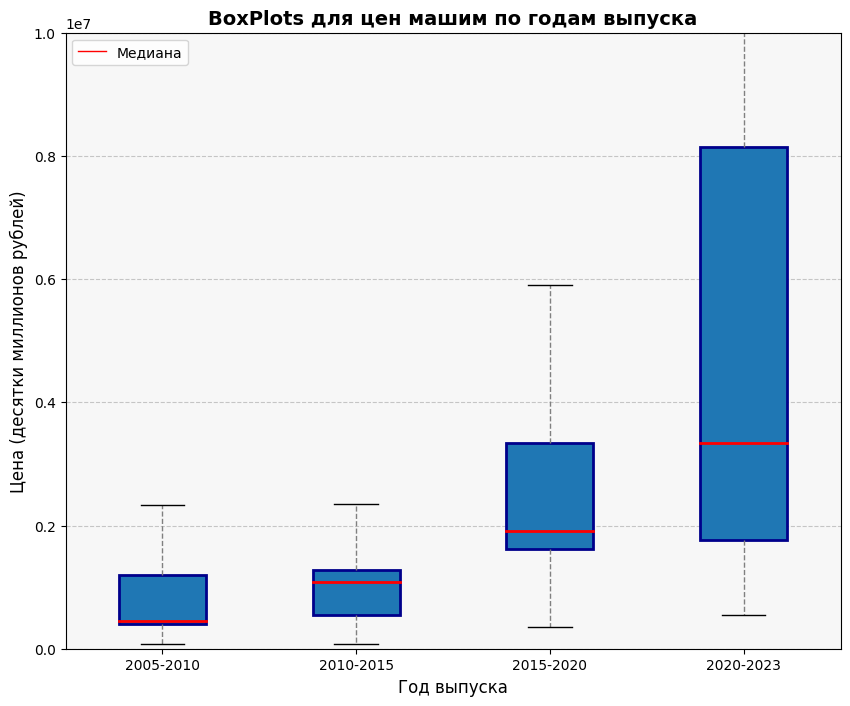

In [152]:
df_2005_2010 = df[(df['year'] >= 2005) & (df['year'] <= 2010)]
df_2010_2015 = df[(df['year'] >= 2010) & (df['year'] <= 2015)]
df_2015_2020 = df[(df['year'] >= 2015) & (df['year'] <= 2020)]
df_2020_2023 = df[df['year'] >= 2020]

boxplot_data = [df_2005_2010['price'],
                df_2010_2015['price'],
                df_2015_2020['price'],
                df_2020_2023['price']]

boxprops = {'linewidth': 2, 'color': 'darkblue'}
medianprops = {'linewidth': 2, 'color': 'red'}
whiskerprops = {'linestyle': '--', 'color': 'gray'}

fig, ax = plt.subplots(figsize = (10, 8))

ax.boxplot(boxplot_data, labels = ['2005-2010',
                                   '2010-2015',
                                   '2015-2020',
                                   '2020-2023'], 
           patch_artist = True,
           boxprops = boxprops,
           medianprops = medianprops,
           whiskerprops = whiskerprops,
           showfliers = False)

red_patch = plt.Line2D([], [], color = 'red', linewidth = 1, label = 'Медиана')
ax.set_ylim([0, 10**7])
ax.set_ylabel('Цена (десятки миллионов рублей)', fontsize = 12)
ax.set_xlabel('Год выпуска', fontsize = 12)
ax.set_title('BoxPlots для цен машим по годам выпуска', weight = 'bold', fontsize = 14)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.7)
ax.set_facecolor('#f7f7f7')
ax.legend(handles = [red_patch])

plt.show()

- Тут же видим, что цены на машины 2015-2020 годов выпуска, а уж тем более 2020-2023 года выпуска существенно выше по сравнению с моделями до 2015 года. Действительно, год выпуска автомобиля сильно влияет на стоимость. Примечательно также, что 1-й и 3-й квартили примерно совпадают по категориям 2005-2010 и 2010-2015, хотя медианные показатели существенно различаются.

### 2.2. Часто продаваемые модели

In [163]:
df.head()

,create_date,custom,num_owners,year,price,region,kilometrage,brand,model,horsepower,engine_type,transmission
0,1.686478e+12,1,3,2018,2020000.0,Москва,61000.0,Audi,A3,150.0,GASOLINE,ROBOT
1,NaN,1,1,2022,8070000.0,Сочи,7000.0,Porsche,Cayman,300.0,GASOLINE,ROBOT
2,NaN,1,2,2017,4000000.0,Екатеринбург,60000.0,Mercedes-Benz,E-Класс,249.0,DIESEL,AUTOMATIC
3,NaN,1,3,2016,1820000.0,Брянск,91000.0,Kia,Sportage,136.0,DIESEL,MECHANICAL
4,NaN,1,1,2021,2850000.0,Ижевск,35000.0,Kia,K5,150.0,GASOLINE,AUTOMATIC


Давайте теперь сгруппируем машины по бренду и посмотрим на распределение количества объявлений по каждой группе. Чтобы избежать отрисовки брендов, объявлений по которым слишком мало, установим минимальный порог количества объявлений для бренда в 400, а тех, кто через порог не перешагивает, отнесём в категорию 'other'.

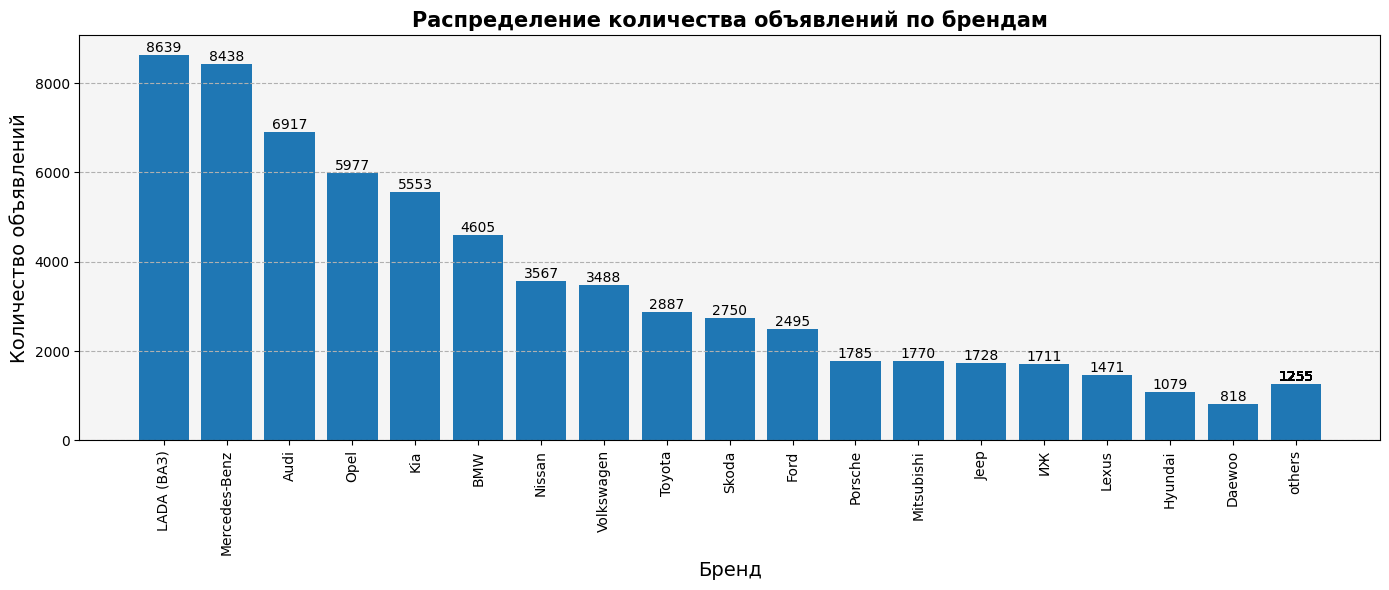

In [162]:
brand_counts = df.groupby('brand').size().reset_index(name = 'num_offers')
brand_counts = brand_counts.sort_values(by = 'num_offers', ascending = False)

threshold = 400
brands_below_threshold = brand_counts[brand_counts['num_offers'] <= threshold]

others_count = brands_below_threshold['num_offers'].sum()
brand_counts.loc[brand_counts['num_offers'] <= threshold, 'brand'] = 'others'
brand_counts.loc[brand_counts['brand'] == 'others', 'num_offers'] = others_count

plt.figure(figsize = (14, 6))

bars = plt.bar(brand_counts['brand'], brand_counts['num_offers'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom')

plt.xlabel('Бренд', fontsize = 14)
plt.ylabel('Количество объявлений', fontsize = 14)
plt.title('Распределение количества объявлений по брендам', weight = 'bold', fontsize = 15)

plt.xticks(rotation = 90)
plt.grid(axis = 'y', linestyle = '--')
plt.gca().set_facecolor('whitesmoke')

plt.tight_layout()
plt.show()

- ИИИИ мы видим, что отечественынй автопром как всегда впереди! Больше всего продают российскую LADA. Пожалуй, рынок auto.ru - одно из немногих мест, в которых LADA может посоревноваться с Mercedez-Benz. Замечательно. 

- Отметим, что не наблюдаются какие-то резкие скачки, количество наблюдений снижается то что называется gradually от восьми тысяч до восьмисот.

### 2.3. Связи между переменными

- До сих пор мы видели лишь, что на цену сильно влияет год выпуска автомобиля (year). Логично подозревать, что аналогичным образом на цене (price) сказывается и пробег (kilometrage). Для анализа связей между этими переменными нарисуем scatterplots.

- Для информативности графиков будет строить scatter plots в рамках конкретных категорий автомобилей (например, только для конкретного бренда), чтобы более дешевые ли дорогие машины лругих категорий не зашумляли наши графики.

- Построим графики рассеяния для пары (пробег, цена) по отдельности для брендов 'LADA (ВАЗ)' и 'Mercedez-Benz'.

- Также, пользуясь **математическими возможностями Python**, возьмём **numpy** для построения линий, наилучшим образом аппроксимирующей полученные облака точек.

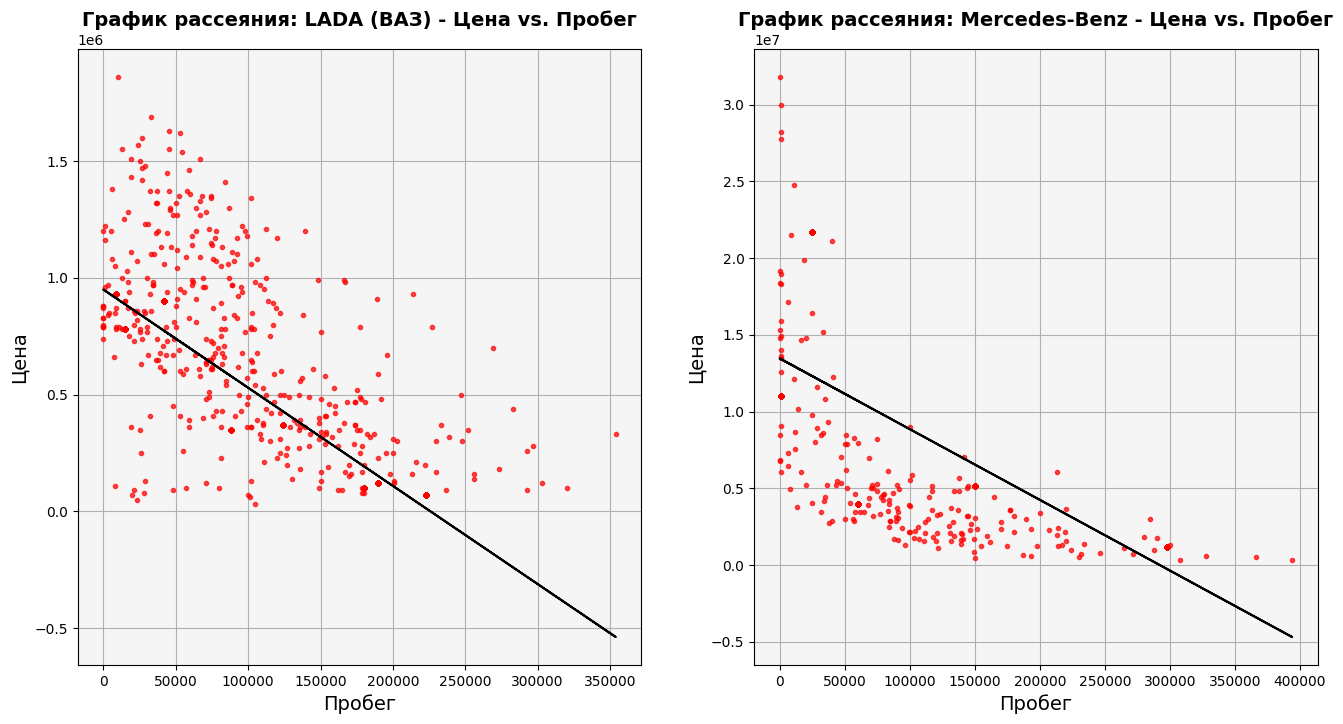

In [190]:
lada_df = df[df['brand'] == 'LADA (ВАЗ)']
mercedes_df = df[df['brand'] == 'Mercedes-Benz']

fig = plt.figure(figsize=(16, 8))

plt1 = fig.add_subplot(1,2,1)
plt2 = fig.add_subplot(1,2,2)

#Рисуем для Лады
plt1.plot(lada_df['kilometrage'],lada_df['price'], 'r.',alpha=0.7)

plt1.set_xlabel('Пробег', fontsize = 14)
plt1.set_ylabel('Цена', fontsize = 14)
plt1.set_title('График рассеяния: LADA (ВАЗ) - Цена vs. Пробег', weight = 'bold', fontsize = 14)
plt1.set_facecolor('whitesmoke')
plt1.grid(True)

# Теперь аппроксимируем первый график прямой:
coeffs = np.polyfit(lada_df['kilometrage'], lada_df['price'], 1)
poly_line = np.poly1d(coeffs)
plt1.plot(lada_df['kilometrage'], poly_line(lada_df['kilometrage']), color = 'black')

#Рисуем для Мерса
plt2.plot(mercedes_df['kilometrage'], mercedes_df['price'], 'r.', alpha=0.7)

plt2.set_xlabel('Пробег', fontsize = 14)
plt2.set_ylabel('Цена', fontsize = 14)
plt2.set_title('График рассеяния: Mercedes-Benz - Цена vs. Пробег', weight = 'bold', fontsize = 14)
plt2.set_facecolor('whitesmoke')
plt2.grid(True)

coeffs = np.polyfit(mercedes_df['kilometrage'], mercedes_df['price'], 1)
poly_line = np.poly1d(coeffs)
plt2.plot(mercedes_df['kilometrage'], poly_line(mercedes_df['kilometrage']), color = 'black')

plt.show()

Действительно, нампай подтверждает, что в рамках конкретного бренда рост пробега негативно сказывается на цене, по которой будет продаваться автомобиль. Моя встроенная нейронная сеть (глаз) смогла заметить такую взаимосвязь гораздо быстрее, чем какой-то там нампай, но тем не менее считаю, что балл за использование маематичсеких возможностей Python я тут получил.

## Часть 3. Географические данные

In [ ]:
!pip install geopandas
import geopandas as gpd
from geopy.geocoders import Nominatim

Пока что в нашем датафрейме есть только данные о названиях городов, в которых находятся продаваемые машины. Давайте же для работы с geopandas переведём эти названия в географические координаты. Только сперва, чтобы не обрабатывать все 67000 объявлений, давайте сгруппируем наш датафрейм к удобному виду.

### 3.1. Группировка данных

Воспользуемся продвинутыми возможностями Pandas, чтобы сгруппировать данные по регионам и получить сводную таблицу о средних ценах и количестве объявлений для каждого региона.

In [70]:
grouped_df = df.groupby('region').agg({'price': 'mean', 'region': 'count'}).rename(columns = {'region': 'num_offers'})
grouped_df.head(5)

,price,num_offers
region,,
Абакан,1.706667e+06,3
Автуры,2.970000e+06,1
Адлер,1.870000e+06,1
Аксай,3.020000e+06,4
Алапаевск,3.000000e+06,1


In [72]:
print(len(grouped_df))

257


Отлично, теперь у нас есть датафрейм с информацией о количестве объявлений и средней ценой объявлений по городам России! Как можно заметить, всего объявления поступали из 257 городов. Давайте взглянем, где наибольшая средняя цена (будем рассматривать города, в которых 10+ объявлений), а также из каких городов поступает больше всего объявлений.

In [74]:
grouped_df[grouped_df['num_offers'] >= 10].sort_values('price', ascending = False).head(5)

,price,num_offers
region,,
Удельная,8.140000e+06,1414
Сочи,8.055501e+06,1716
Чебоксары,6.578730e+06,63
Солигорск,6.550000e+06,1685
Владивосток,6.065000e+06,16


Теперь лидеры по количеству объявлений

In [85]:
grouped_df.sort_values('num_offers', ascending = False).head(5)

,price,num_offers
region,,
Москва,2.715172e+06,21497
Санкт-Петербург,5.872347e+06,6813
Ижевск,1.703894e+06,4813
Нижний Новгород,1.548582e+06,3505
Брянск,1.724160e+06,3457


### 3.2. Геокодирование

In [114]:
#создаём геокодер
geolocator = Nominatim(user_agent = 'my_geocoder')
grouped_df['latitude'] = None
grouped_df['longitude'] = None

for city in grouped_df.index:
  location = geolocator.geocode(city + ', Россия')
  if location is not None:
    grouped_df.at[city, 'latitude'] = location.latitude
    grouped_df.at[city, 'longitude'] = location.longitude

In [115]:
geo_df = gpd.GeoDataFrame(grouped_df, geometry = gpd.points_from_xy(grouped_df.longitude, grouped_df.latitude))
geo_df.head(5)

,price,num_offers,latitude,longitude,geometry
region,,,,,
Абакан,1.706667e+06,3,53.720609,91.440405,POINT (91.44040 53.72061)
Автуры,2.970000e+06,1,43.164989,46.000431,POINT (46.00043 43.16499)
Адлер,1.870000e+06,1,43.425383,39.923704,POINT (39.92370 43.42538)
Аксай,3.020000e+06,4,47.268696,39.861362,POINT (39.86136 47.26870)
Алапаевск,3.000000e+06,1,57.850811,61.695,POINT (61.69500 57.85081)


### 3.3. Создание красивой карты

Наконец, давайте построим карту России, на которой отметим в качестве точек города из нашего GeoDataFrame. Сделаем так, чтобы размер точек на карте был пропорционален количеству объявлений из соответствующего города, а цвет - пропорционален цене. Чем более доступные машины продаются в городе - тем более зелёным будет цвет точки, и соответственно наоборот с красным - дорогим городам будут соответствовать красные точки.

In [116]:
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

<ipython-input-134-d712dea56da0>:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


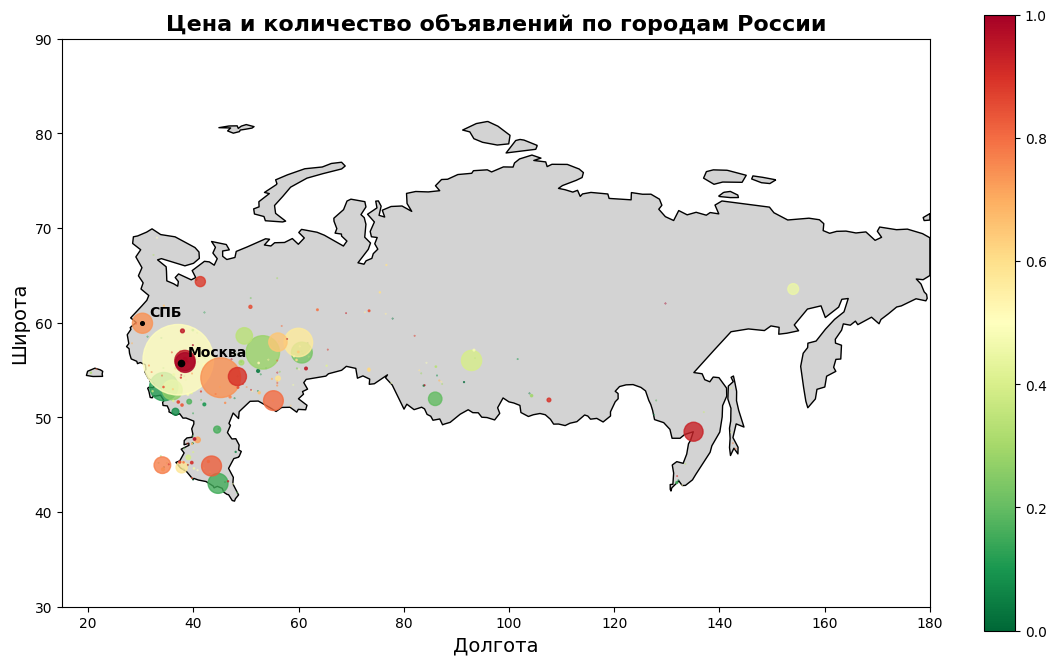

In [134]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize = (14, 8))
world_data[world_data['name'] == 'Russia'].plot(ax = ax, color = 'lightgray', edgecolor = 'black')

geo_df.plot(ax = ax,
            markersize = geo_df['num_offers'] * 0.12,
            c = price,
            cmap = 'RdYlGn_r',
            vmax = 10**7 * 0.8,
            legend = True,
            alpha = 0.8)

sm = plt.cm.ScalarMappable(cmap = 'RdYlGn_r')
sm.set_array([])
cbar = plt.colorbar(sm)

moscow = geo_df[geo_df.index == 'Москва']
moscow.plot(ax = ax,
            color = 'black',
            markersize = 20,
            marker = 'o',
            label = 'Москва')
ax.annotate('Москва',
            xy = (moscow.geometry.x, moscow.geometry.y),
            xytext = (5, 5),
            textcoords = 'offset points',
            weight = 'bold')

spb = geo_df[geo_df.index == 'Санкт-Петербург']
spb.plot(ax = ax,
         color = 'black',
         markersize = 7,
         marker = 'o',
         label = 'СПБ')
ax.annotate('СПБ',
            xy = (spb.geometry.x, spb.geometry.y),
            xytext = (5, 5),
            textcoords = 'offset points',
            weight = 'bold')

ax.set_xlim([15, 180])
ax.set_ylim([30, 90])
ax.set_aspect(aspect = 1.8)
ax.set_xlabel('Долгота', fontsize = 14)
ax.set_ylabel('Широта', fontsize = 14)
ax.set_title('Цена и количество объявлений по городам России', weight = 'bold', fontsize = 16)

plt.show()

- Мы можем наблюдать, что больше всего объявлений о продаже поступае из Москвы и Санкт-Петербурга (они специально отмечены на карте). Точка, соответствующая Москве, особенно выделяется среди всех остальных своим размером. Примечательно, что в силу количества объявлений из Москвы, машины из столицы гораздо доступнее, чем те, что продаются в Сочи и городах подмосковья (например, объявления в Удельной и Солигорске).

- Четко видно, что объявления сильно сконцентрированы в центральной и западной части России.

Можно даже приблизитсься в область от юга России до центра, тобы поближе рассмотреть интересующие нас города:


<ipython-input-140-01e00c000a0e>:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


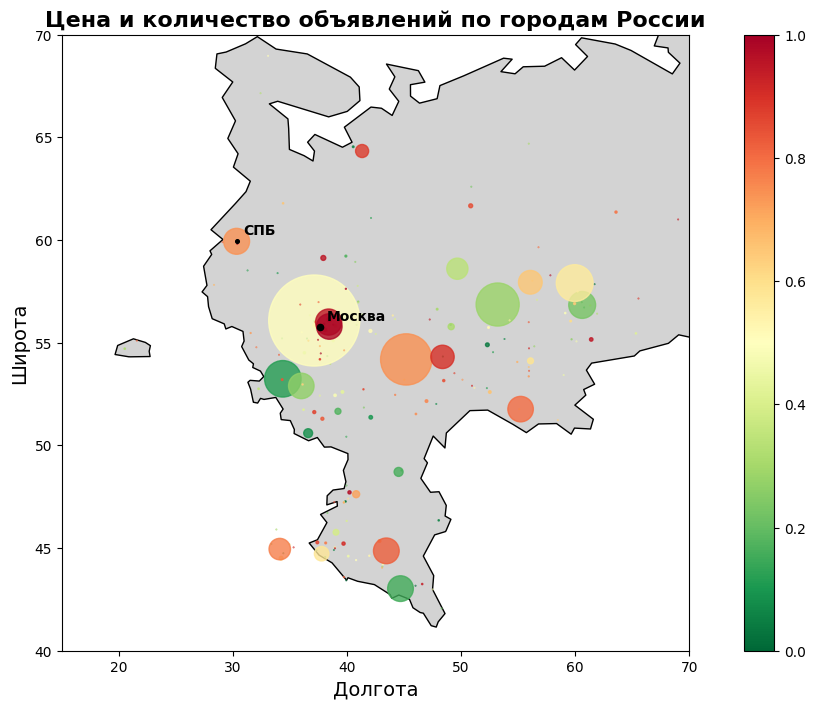

In [140]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize = (14, 8))
world_data[world_data['name'] == 'Russia'].plot(ax = ax, color = 'lightgray', edgecolor = 'black')

geo_df.plot(ax = ax,
            markersize = geo_df['num_offers'] * 0.2,
            c = price,
            cmap = 'RdYlGn_r',
            vmax = 10**7 * 0.8,
            legend = True,
            alpha = 0.8)

sm = plt.cm.ScalarMappable(cmap = 'RdYlGn_r')
sm.set_array([])
cbar = plt.colorbar(sm)

moscow = geo_df[geo_df.index == 'Москва']
moscow.plot(ax = ax,
            color = 'black',
            markersize = 20,
            marker = 'o',
            label = 'Москва')
ax.annotate('Москва',
            xy = (moscow.geometry.x, moscow.geometry.y),
            xytext = (5, 5),
            textcoords = 'offset points',
            weight = 'bold')

spb = geo_df[geo_df.index == 'Санкт-Петербург']
spb.plot(ax = ax,
         color = 'black',
         markersize = 7,
         marker = 'o',
         label = 'СПБ')
ax.annotate('СПБ',
            xy = (spb.geometry.x, spb.geometry.y),
            xytext = (5, 5),
            textcoords = 'offset points',
            weight = 'bold')

ax.set_xlim([15, 70])
ax.set_ylim([40, 70])
ax.set_aspect(aspect = 1.8)
ax.set_xlabel('Долгота', fontsize = 14)
ax.set_ylabel('Широта', fontsize = 14)
ax.set_title('Цена и количество объявлений по городам России', weight = 'bold', fontsize = 16)

plt.show()

## Часть 4. Анализ с помощью графов

Давайте проведём анализ нашего рынка с помощью библиотеки **networkx**. Представим города из нашего датафрейма в виде вершин графа, и будем проводить между ними ребро, если существует такой бренд (brand), что в обоих регионах по этому бренду количество продаж превосходит 400 (пороговое значение в одном из предыдущих пунктов). А далее визуализируем наш граф и попробуем проанализировать.

### 4.1. Построение графа

In [200]:
import networkx as nx

G = nx.Graph()

regions = df['region'].unique()  # Получаем уникальные регионы из столбца 'region'
brands = df['brand'].unique()  # Получаем уникальные бренды из столбца 'brand'
connected_brands = []

for brand in brands:
    brand_count = df[df['brand'] == brand]['brand'].count()  # Подсчет количества записей с данным брендом
    if brand_count > 400:
        connected_brands.append(brand)

G.add_nodes_from(regions)

for i in range(len(regions)):
    for j in range(i + 1, len(regions)):
        region1 = regions[i]
        region2 = regions[j]
        common_brands = set(df[df['region'] == region1]['brand']).intersection(set(df[df['region'] == region2]['brand']))
        common_connected_brands = [brand for brand in connected_brands if brand in common_brands]
        if len(common_connected_brands) > 0:
            G.add_edge(region1, region2)

In [204]:
print(f'Количество уникальных вершин равно {G.number_of_nodes()}')
print(f'Количество рёбер в графе равно {G.number_of_edges()}')

Количество уникальных вершин равно 257
Количество рёбер в графе равно 11143


Посмотрим, какие вершины в нашем графе являются изолированными, то есть вершинами степени ноль.

In [214]:
list(nx.isolates(G))

['Евпатория',
 'Александровское',
 'Сергиев Посад',
 'Ковров',
 'Алушта',
 'Могилёв',
 'Уссурийск',
 'Крыловская',
 'Румянцево',
 'Кимовск',
 'Мостовской',
 'Вязники',
 'Кстово',
 'Александров',
 'Каджером',
 'Ржавки',
 'Сызрань',
 'Кировский',
 'Бузулук',
 'Погромное',
 'Ясногорск',
 'Новофёдоровка',
 'Афипский',
 'Невинномысск',
 'Красный Ясыл',
 'Витебск',
 'Светлоград',
 'Советский',
 'Ростовская область',
 'Гуково',
 'Солнечный',
 'Чехов']

И удалим эти вершины из нашего графа, поскольку они нам не интересны:

In [218]:
G.remove_nodes_from(list(nx.isolates(G)))
print(f'После удаления изолированных вершин осталось {G.number_of_nodes()} вершин')

После удаления изолированных вершин осталось 225 вершин


### 4.2. Визуализация подграфа

Поскольку исходный граф просто ужасно большой, обрежем его и оставим лишь 20 вершин, степени которых наибольшие, и визуализируем этот граф. Для наглядности сделаем так, чтобы размеры вершин были пропорциональны их степеням в изначальносм графе G.

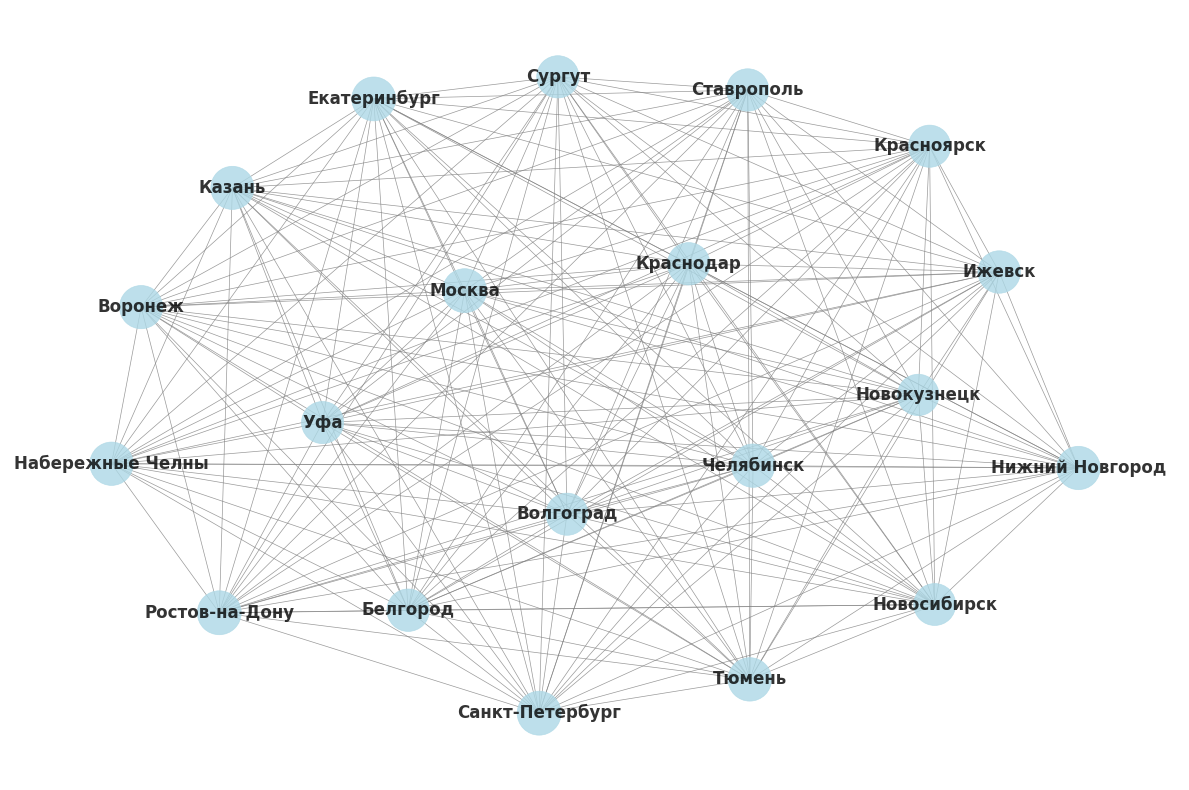

In [241]:
degrees = dict(G.degree())
sorted_nodes = sorted(degrees, key=lambda x: degrees[x], reverse=True)

top_nodes = sorted_nodes[:20]

subgraph = G.subgraph(top_nodes)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgraph)
subgraph_degrees = dict(subgraph.degree())

max = np.max(list(degrees.values()))
node_sizes = [1000 * degrees[node] / max for node in subgraph.nodes()]

nx.draw_networkx(
    subgraph,
    pos=pos,
    with_labels=True,
    node_color='lightblue',  
    node_size=node_sizes,  
    edge_color='gray',  
    width=0.5, 
    alpha=0.8,  
    font_size=12,  
    font_color='black',
    font_weight='bold',  
    linewidths=0.5,  
    edge_cmap=plt.cm.Blues,  
    edge_vmin=0.0, 
    edge_vmax=1.0)

plt.axis('off')
plt.tight_layout() 
plt.show()

In [278]:
print(degrees['Москва'])
print(degrees['Санкт-Петербург'])
print(degrees['Краснодар'])

224
224
209


## Часть 5. Машинное обучение и матстат

### 5.1. Катбуст

In [251]:
#!pip install catboost
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor

target = 'price'
features = ['custom', 'num_owners', 'year', 'region', 'kilometrage', 'brand', 'model', 'horsepower', 'engine_type', 'transmission']

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
categorical_features = ['region', 'brand', 'model', 'engine_type', 'transmission']

In [ ]:
model = CatBoostRegressor(iterations = 1000,
                          learning_rate = 0.1,
                          loss_function = 'MAE')
model.fit(X_train, y_train, cat_features = categorical_features)

y_pred = model.predict(X_test)

mape = mean_absolute_error(y_test, y_pred)

In [253]:
print('MAE:', mape)

MAE: 42995.951215321234


Хорошие результаты на MAE!

In [254]:
importance = pd.DataFrame({'Признак': features, 'Значимость': model.feature_importances_})
importance

,Признак,Значимость
0,custom,0.000000
1,num_owners,10.833219
2,year,5.311431
3,region,1.820870
4,kilometrage,27.842975
5,brand,26.153022
6,model,0.128012
7,horsepower,20.942985
8,engine_type,1.408956
9,transmission,5.558531


И мы действительно видим, что результаты модели catboost отлично соотносятся с нашим представлением о цене машины: прежде всего важны километраж, бренд и количество владельцев. Немного удивляет, что не таким важным признаком оказался год выпуска автомобиля, однако все остальное совпадает с нашим представлением о прайсинге машин.

### 5.2. Матстат.

Поскольку мы видим, что пробег (километраж) оказывает решающее влияние на цену, которую автор объявления выберет для своего автомобиля, то давайте попробуем найти распределение, которое могло бы описывать какую-либо из этих переменных.

In [263]:
df = pd.concat([X, y], axis = 1)
df.head()

,custom,num_owners,year,region,kilometrage,brand,model,horsepower,engine_type,transmission,price
0,1,3,2018,Москва,61000.0,Audi,A3,150.0,GASOLINE,ROBOT,2020000.0
1,1,1,2022,Сочи,7000.0,Porsche,Cayman,300.0,GASOLINE,ROBOT,8070000.0
2,1,2,2017,Екатеринбург,60000.0,Mercedes-Benz,E-Класс,249.0,DIESEL,AUTOMATIC,4000000.0
3,1,3,2016,Брянск,91000.0,Kia,Sportage,136.0,DIESEL,MECHANICAL,1820000.0
4,1,1,2021,Ижевск,35000.0,Kia,K5,150.0,GASOLINE,AUTOMATIC,2850000.0


Для определеяния распределения мы будем использовать тест Колмогорова-Смирнова на проверку рпинадлежности выборки какому-либо распределению. В качестве проверки будем выводить p-value наших тестов.

In [274]:
from scipy import stats

cols = ['price', 'kilometrage']

results = pd.DataFrame(index = cols, columns = ['Best distribution', 'Best parameters'])

for col in cols:
  data = df[col]

  distributions = [stats.expon, stats.loglaplace, stats.rayleigh,
                   stats.pareto, stats.laplace, stats.laplace_asymmetric,
                   stats.cauchy, stats.gumbel_r, stats.gumbel_l,
                   stats.chi2] #список рапсределний, из которых будет выбирать

  best_distribution = None
  best_params = None
  best_p_value = 0

  for distribution in distributions:
    params = distribution.fit(data)

    if distribution == stats.t:
      deg_f = int(params[0])
      loc = params[1]
      scale = params[2]
      t_dist = stats.t(deg_f, loc = loc, scale = scale)

      params = [deg_f, loc, scale]
      p_value = stats.kstest(data, distribution.cdf, args = params).pvalue
      
    else:

      p_value = stats.kstest(data, distribution.cdf, args = params).pvalue

    if p_value >= best_p_value:
      best_p_value = p_value
      best_distribution = distribution.name
      best_params = params

  results.loc[col] = [best_distribution, np.round(best_params,4)]

  print(best_p_value)

results

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5574: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:5049: RuntimeWarning: overflow encountered in exp
  np.exp(x*kapinv)*(kappa/kappkapinv))


1.8067809645045214e-297


/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:7762: RuntimeWarning: overflow encountered in true_divide
  s3 = (1/xm).sum()


0.0


,Best distribution,Best parameters
price,pareto,"[2.9099, -5582143.4027, 5612143.4027]"
kilometrage,chi2,"[0.0002, -0.0, 2.2958]"


Мы получили, что наши переменные не подчиняются никакому из выбранных распределений, посокльку наилучшее p-value так и не смогло отойти от нуля. Что ж, это ничего, вряд ли стоило ожидать, что наши переменные можно рассматривать как какие-то случайные величины, такой анализ подойдет скорее для доходностей акций или влают.

## Часть 6. Итоги

- Итак, посредством такого анализа, с помощью визуализации, географического анализа, графов и машинного обучения мы смогли увидеть, что цена автомобилей на рынке auto.ru в основном определяется пробегом, количеством лошадиных сил, количеством обладателей и, разумеется, брендом автомобиля. С помощью визуализации (в частности, ящика с усами) мы также выявили резкий скачок по ценам автомобилей в зависимости от категории по году производства автомобиля.

- Можно было заметить, что, несмотря на то, что Москва ожидаемо оказалась городом с наибольшим количеством объявлений, самые дорогие машины продаются отнюдь не в столице, а в Подмосковье (что замечательно видно по старательно выполненной карте в геопандас).

- Кроме того мы выявили связи между городами в терминах схожести продаваемых машин (схожесть по брендам продаваемых машин). Оказалось, что и Москва, и Санкт-Петербург связаны со всеми вершиными, имеющими степень хотя бы 1. Таким образом, мы можем судить о том, что в двух столицах России представлен самый широкий ассортимент автомобилей.

Всё!